- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [14]:
os.listdir()

['.ipynb_checkpoints',
 'football.ipynb',
 'goalscorers.csv',
 'results.csv',
 'shootouts.csv']

In [3]:
results_df = pd.read_csv("results.csv")
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47912,2024-11-19,Oman,Iraq,0,1,FIFA World Cup qualification,Muscat,Oman,False
47913,2024-11-19,Kuwait,Jordan,1,1,FIFA World Cup qualification,Kuwait City,Kuwait,False
47914,2024-11-19,Bahrain,Australia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47915,2024-11-19,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [20]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [22]:
results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [24]:
results_df.duplicated().sum()

0

In [54]:
results_df.shape

(47917, 9)

In [33]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [48]:
results_df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,47917.0,1.757873,1.772538,0.0,1.0,1.0,2.0,31.0
away_score,47917.0,1.181752,1.399573,0.0,0.0,1.0,2.0,21.0


In [149]:
len(np.unique(results_df["tournament"]))

176

In [147]:
len(np.unique(results_df["away_team"]))

321

In [5]:
results_df["date"] = pd.to_datetime(results_df["date"])
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        47917 non-null  datetime64[ns]
 1   home_team   47917 non-null  object        
 2   away_team   47917 non-null  object        
 3   home_score  47917 non-null  int64         
 4   away_score  47917 non-null  int64         
 5   tournament  47917 non-null  object        
 6   city        47917 non-null  object        
 7   country     47917 non-null  object        
 8   neutral     47917 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


In [88]:
np.unique(results_df["home_score"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 24, 30, 31], dtype=int64)

In [90]:
np.unique(results_df["away_score"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [7]:
ina_home_df = results_df[results_df["home_team"] == "Indonesia"]
ina_away_df = results_df[results_df["away_team"] == "Indonesia"]
# print(ina_home_df)
# print(ina_away_df)
ina = [ina_home_df, ina_away_df]
ina_df = pd.concat(ina).sort_values(by="date")
ina_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1823,1934-05-13,Japan,Indonesia,1,7,Far Eastern Championship Games,Manila,Philippines,True
1822,1934-05-13,Japan,Indonesia,1,7,Friendly,Manila,Philippines,True
1824,1934-05-14,China PR,Indonesia,2,0,Friendly,Manila,Philippines,True
1825,1934-05-14,China PR,Indonesia,2,0,Far Eastern Championship Games,Manila,Philippines,True
1828,1934-05-19,Philippines,Indonesia,3,2,Friendly,Manila,Philippines,False
...,...,...,...,...,...,...,...,...,...
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False
47636,2024-10-10,Bahrain,Indonesia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47775,2024-10-15,China PR,Indonesia,2,1,FIFA World Cup qualification,Qingdao,China PR,False
47832,2024-11-15,Indonesia,Japan,0,4,FIFA World Cup qualification,Jakarta,Indonesia,False


In [9]:
ina_home_win = ina_home_df[ina_home_df["home_score"] > ina_home_df["away_score"]]
ina_home_win["date"].count()

207

In [11]:
ina_home_lose = ina_home_df[ina_home_df["home_score"] < ina_home_df["away_score"]]
ina_home_lose["date"].count()

130

In [13]:
ina_away_win = ina_away_df[ina_away_df["away_score"] > ina_away_df["home_score"]]
ina_away_win["date"].count()

68

In [15]:
ina_away_lose = ina_away_df[ina_away_df["away_score"] < ina_away_df["home_score"]]
ina_away_lose["date"].count()

167

In [17]:
ina_draw = ina_df[ina_df["home_score"] == ina_df["away_score"]]
ina_draw["date"].count()

140

29.07303273677826
18.25842708349228
9.550561755895615
23.45505654811859
19.662921130657196


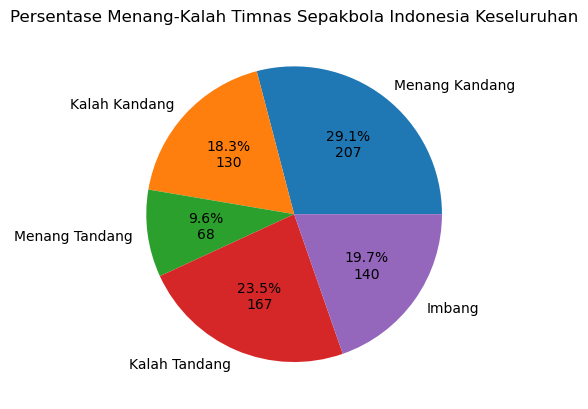

In [21]:
ina_matches = [ina_home_win["date"].count(), ina_home_lose["date"].count(),
               ina_away_win["date"].count(), ina_away_lose["date"].count(),
              ina_draw["date"].count()]
labels = ["Menang Kandang", "Kalah Kandang", "Menang Tandang", "Kalah Tandang", "Imbang"]
def fmt(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_matches)*x/100)

plt.pie(ina_matches, labels=labels, autopct=fmt)
plt.title("Persentase Menang-Kalah Timnas Sepakbola Indonesia Keseluruhan")
plt.show()

In [167]:
len(np.unique(results_df["tournament"]))

176

In [23]:
ina_tournament = ina_df.groupby(by=["tournament"]).agg({
    'date': 'count',
}).sort_values(by="date", ascending=False).reset_index()
ina_tournament

,tournament,date
0,Friendly,177
1,Merdeka Tournament,105
2,FIFA World Cup qualification,93
3,AFF Championship,75
4,Southeast Asian Games,56
5,AFC Asian Cup qualification,53
6,Indonesia Tournament,33
7,King's Cup,31
8,Asian Games,29
9,Korea Cup,25


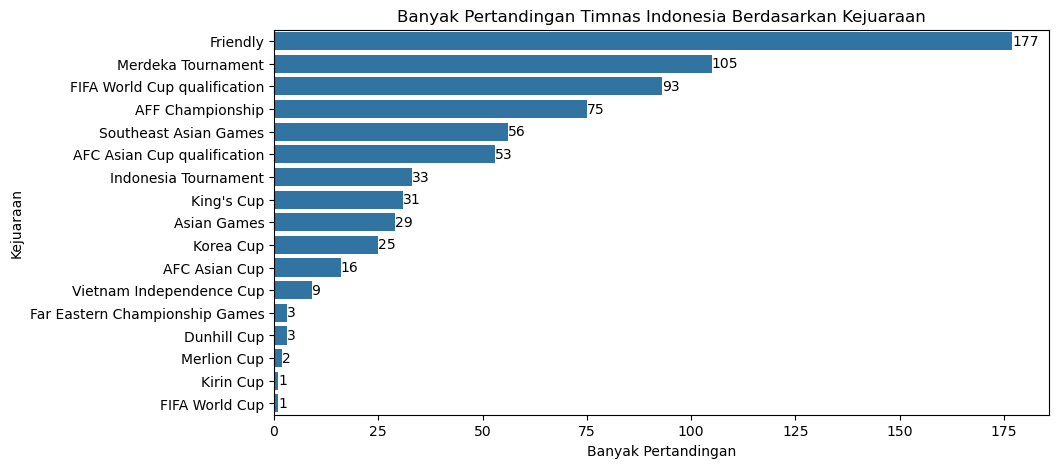

In [25]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=ina_tournament, x="date", y="tournament", orient="h"
)
g.bar_label(g.containers[0])

plt.title("Banyak Pertandingan Timnas Indonesia Berdasarkan Kejuaraan")
plt.xlabel("Banyak Pertandingan")
plt.ylabel("Kejuaraan")
plt.show()

**INA VS MAL**

In [27]:
home_ina_vs_mal = ina_home_df[ina_home_df["away_team"] == "Malaysia"] 
len(home_ina_vs_mal)

41

In [29]:
ina_win_vs_mal = home_ina_vs_mal[home_ina_vs_mal["home_score"] > home_ina_vs_mal["away_score"]]
len(ina_win_vs_mal)

24

In [31]:
ina_draw_vs_mal = home_ina_vs_mal[home_ina_vs_mal["home_score"] == home_ina_vs_mal["away_score"]]
len(ina_draw_vs_mal)

7

In [33]:
ina_lose_vs_mal = home_ina_vs_mal[home_ina_vs_mal["home_score"] < home_ina_vs_mal["away_score"]]
len(ina_lose_vs_mal)

10

In [35]:
ina_vs_mal_home_df = [len(ina_win_vs_mal), len(ina_draw_vs_mal), len(ina_lose_vs_mal)]

In [37]:
away_ina_vs_mal = ina_away_df[ina_away_df["home_team"] == "Malaysia"] 
len(away_ina_vs_mal)

31

In [39]:
mal_win_vs_ina = away_ina_vs_mal[away_ina_vs_mal["home_score"] > away_ina_vs_mal["away_score"]]
len(mal_win_vs_ina)

14

In [41]:
mal_draw_vs_ina = away_ina_vs_mal[away_ina_vs_mal["home_score"] == away_ina_vs_mal["away_score"]]
len(mal_draw_vs_ina)

9

In [43]:
mal_lose_vs_ina = away_ina_vs_mal[away_ina_vs_mal["home_score"] < away_ina_vs_mal["away_score"]]
len(mal_lose_vs_ina)

8

In [45]:
ina_vs_mal_away_df = [len(mal_win_vs_ina), len(mal_draw_vs_ina), len(mal_lose_vs_ina)]

In [139]:
overall_win_ina_vs_mal = len(ina_win_vs_mal) + len(mal_lose_vs_ina)
overall_draw_ina_vs_mal = len(ina_draw_vs_mal) + len(mal_draw_vs_ina)
overall_lose_ina_vs_mal = len(ina_lose_vs_mal) + len(mal_win_vs_ina)
overall_ina_vs_mal_df = [overall_win_ina_vs_mal, overall_draw_ina_vs_mal, overall_lose_ina_vs_mal]

44.44444477558136
22.22222238779068
33.33333432674408
58.53658318519592
17.073170840740204
24.390244483947754
45.16128897666931
29.032257199287415
25.806450843811035


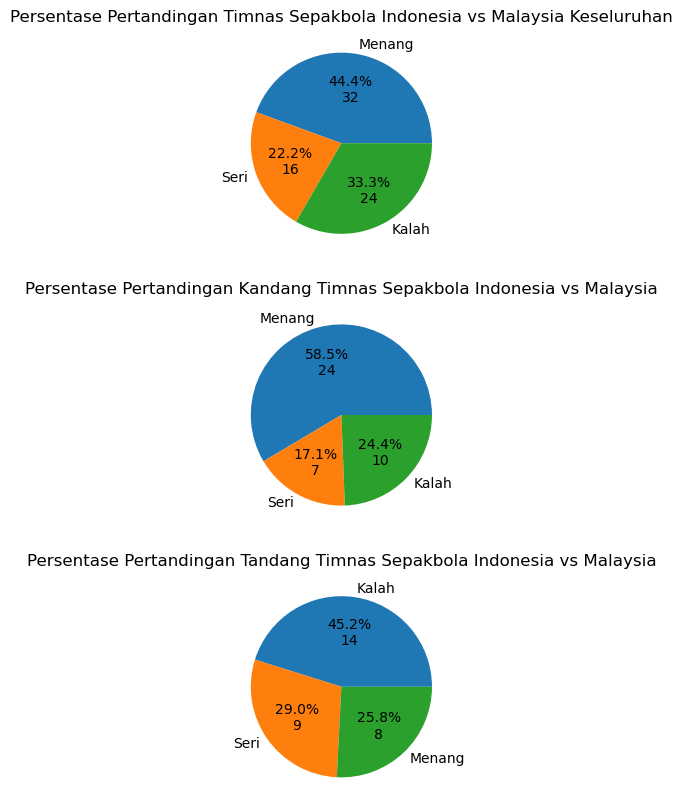

In [141]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

def fmt_overall(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(overall_ina_vs_mal_df)*x/100)
    
ax[0].pie(overall_ina_vs_mal_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_overall)
ax[0].set_title("Persentase Pertandingan Timnas Sepakbola Indonesia vs Malaysia Keseluruhan")

def fmt_home(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_mal_home_df)*x/100)
    
ax[1].pie(ina_vs_mal_home_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_home)
ax[1].set_title("Persentase Pertandingan Kandang Timnas Sepakbola Indonesia vs Malaysia")

def fmt_away(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_mal_away_df)*x/100)

ax[2].pie(ina_vs_mal_away_df, labels=["Kalah", "Seri", "Menang"], autopct=fmt_away)
ax[2].set_title("Persentase Pertandingan Tandang Timnas Sepakbola Indonesia vs Malaysia")

plt.show()

**INA VS VIE**

In [51]:
home_ina_vs_vie = ina_home_df[ina_home_df["away_team"] == "Vietnam"] 
len(home_ina_vs_vie)

15

In [53]:
ina_win_vs_vie = home_ina_vs_vie[home_ina_vs_vie["home_score"] > home_ina_vs_vie["away_score"]]
len(ina_win_vs_vie)

7

In [55]:
ina_draw_vs_vie = home_ina_vs_vie[home_ina_vs_vie["home_score"] == home_ina_vs_vie["away_score"]]
len(ina_draw_vs_vie)

5

In [57]:
ina_lose_vs_vie = home_ina_vs_vie[home_ina_vs_vie["home_score"] < home_ina_vs_vie["away_score"]]
len(ina_lose_vs_vie)

3

In [59]:
ina_vs_vie_home_df = [len(ina_win_vs_vie), len(ina_draw_vs_vie), len(ina_lose_vs_vie)]

In [61]:
away_ina_vs_vie = ina_away_df[ina_away_df["home_team"] == "Vietnam"] 
len(away_ina_vs_vie)

14

In [63]:
vie_win_vs_ina = away_ina_vs_vie[away_ina_vs_vie["home_score"] > away_ina_vs_vie["away_score"]]
len(vie_win_vs_ina)

5

In [65]:
vie_draw_vs_ina = away_ina_vs_vie[away_ina_vs_vie["home_score"] == away_ina_vs_vie["away_score"]]
len(vie_draw_vs_ina)

5

In [67]:
vie_lose_vs_ina = away_ina_vs_vie[away_ina_vs_vie["home_score"] < away_ina_vs_vie["away_score"]]
len(vie_lose_vs_ina)

4

In [69]:
ina_vs_vie_away_df = [len(vie_win_vs_ina), len(vie_draw_vs_ina), len(vie_lose_vs_ina)]

In [145]:
overall_win_ina_vs_vie = len(ina_win_vs_vie) + len(vie_lose_vs_ina)
overall_draw_ina_vs_vie = len(ina_draw_vs_vie) + len(vie_draw_vs_ina)
overall_lose_ina_vs_vie = len(ina_lose_vs_vie) + len(vie_win_vs_ina)
overall_ina_vs_vie_df = [overall_win_ina_vs_vie, overall_draw_ina_vs_vie, overall_lose_ina_vs_vie]

37.931033968925476
34.48275923728943
27.586206793785095
46.666666865348816
33.33333432674408
20.000000298023224
35.71428656578064
35.71428656578064
28.57142984867096


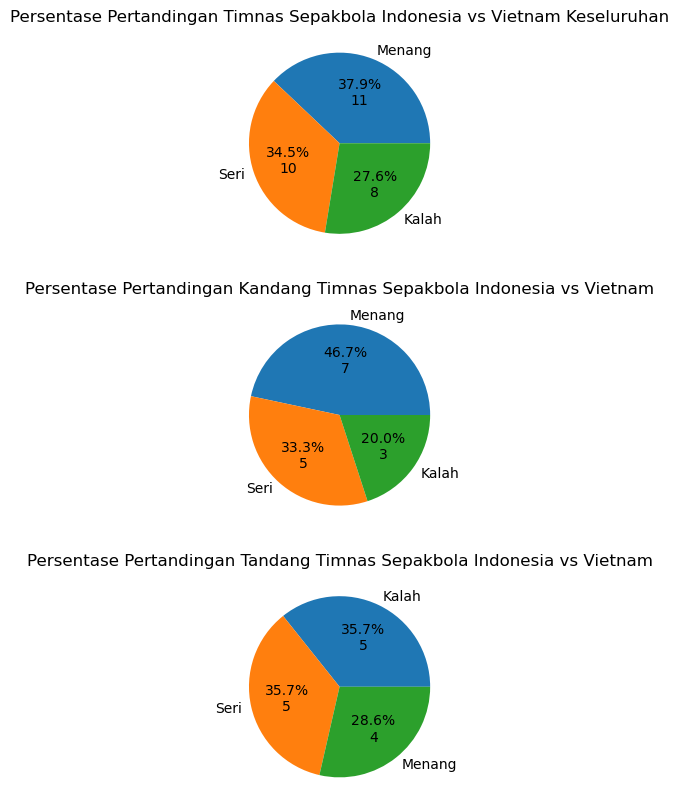

In [149]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

def fmt_overall(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(overall_ina_vs_vie_df)*x/100)
    
ax[0].pie(overall_ina_vs_vie_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_overall)
ax[0].set_title("Persentase Pertandingan Timnas Sepakbola Indonesia vs Vietnam Keseluruhan")

def fmt_home(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_vie_home_df)*x/100)
    
ax[1].pie(ina_vs_vie_home_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_home)
ax[1].set_title("Persentase Pertandingan Kandang Timnas Sepakbola Indonesia vs Vietnam")

def fmt_away(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_vie_away_df)*x/100)

ax[2].pie(ina_vs_vie_away_df, labels=["Kalah", "Seri", "Menang"], autopct=fmt_away)
ax[2].set_title("Persentase Pertandingan Tandang Timnas Sepakbola Indonesia vs Vietnam")

plt.show()

**INA VS THA**

In [73]:
home_ina_vs_tha = ina_home_df[ina_home_df["away_team"] == "Thailand"] 
len(home_ina_vs_tha)

41

In [75]:
ina_win_vs_tha = home_ina_vs_tha[home_ina_vs_tha["home_score"] > home_ina_vs_tha["away_score"]]
len(ina_win_vs_tha)

16

In [77]:
ina_draw_vs_tha = home_ina_vs_tha[home_ina_vs_tha["home_score"] == home_ina_vs_tha["away_score"]]
len(ina_draw_vs_tha)

11

In [79]:
ina_lose_vs_tha = home_ina_vs_tha[home_ina_vs_tha["home_score"] < home_ina_vs_tha["away_score"]]
len(ina_lose_vs_tha)

14

In [81]:
ina_vs_tha_home_df = [len(ina_win_vs_tha), len(ina_draw_vs_tha), len(ina_lose_vs_tha)]

In [83]:
away_ina_vs_tha = ina_away_df[ina_away_df["home_team"] == "Thailand"] 
len(away_ina_vs_tha)

27

In [85]:
tha_win_vs_ina = away_ina_vs_tha[away_ina_vs_tha["home_score"] > away_ina_vs_tha["away_score"]]
len(tha_win_vs_ina)

19

In [87]:
tha_draw_vs_ina = away_ina_vs_tha[away_ina_vs_tha["home_score"] == away_ina_vs_tha["away_score"]]
len(tha_draw_vs_ina)

5

In [89]:
tha_lose_vs_ina = away_ina_vs_tha[away_ina_vs_tha["home_score"] < away_ina_vs_tha["away_score"]]
len(tha_lose_vs_ina)

3

In [91]:
ina_vs_tha_away_df = [len(tha_win_vs_ina), len(tha_draw_vs_ina), len(tha_lose_vs_ina)]

In [151]:
overall_win_ina_vs_tha = len(ina_win_vs_tha) + len(tha_lose_vs_ina)
overall_draw_ina_vs_tha = len(ina_draw_vs_tha) + len(tha_draw_vs_ina)
overall_lose_ina_vs_tha = len(ina_lose_vs_tha) + len(tha_win_vs_ina)
overall_ina_vs_tha_df = [overall_win_ina_vs_tha, overall_draw_ina_vs_tha, overall_lose_ina_vs_tha]

27.941176295280457
23.52941185235977
48.52941036224365
39.024388790130615
26.829269528388977
34.14634168148041
70.37037014961243
18.518517911434174
11.11111119389534


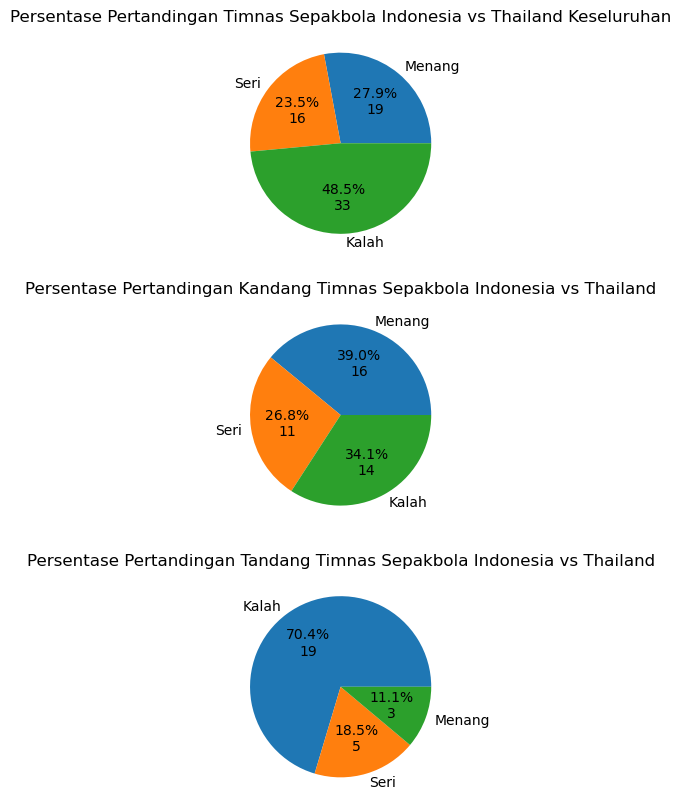

In [155]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

def fmt_overall(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(overall_ina_vs_tha_df)*x/100)
    
ax[0].pie(overall_ina_vs_tha_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_overall)
ax[0].set_title("Persentase Pertandingan Timnas Sepakbola Indonesia vs Thailand Keseluruhan")

def fmt_home(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_tha_home_df)*x/100)
    
ax[1].pie(ina_vs_tha_home_df, labels=["Menang", "Seri", "Kalah"], autopct=fmt_home)
ax[1].set_title("Persentase Pertandingan Kandang Timnas Sepakbola Indonesia vs Thailand")

def fmt_away(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ina_vs_tha_away_df)*x/100)

ax[2].pie(ina_vs_tha_away_df, labels=["Kalah", "Seri", "Menang"], autopct=fmt_away)
ax[2].set_title("Persentase Pertandingan Tandang Timnas Sepakbola Indonesia vs Thailand")

plt.show()

**Timnas Indonesia Coach Shin Tae Yong Era**

In [93]:
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 12, 31)
index = pd.date_range(start, end)
len(index)

366

In [95]:
ina_20_df = ina_df[ina_df["date"].dt.year == 2020]

home_ina_20_df = ina_20_df[ina_20_df["home_team"] == "Indonesia"]
win_home_ina_20_df = home_ina_20_df[home_ina_20_df["home_score"] > home_ina_20_df["away_score"]]
lose_home_ina_20_df = home_ina_20_df[home_ina_20_df["home_score"] < home_ina_20_df["away_score"]]
draw_home_ina_20_df = home_ina_20_df[home_ina_20_df["home_score"] == home_ina_20_df["away_score"]]

away_ina_20_df = ina_20_df[ina_20_df["away_team"] == "Indonesia"]
win_away_ina_20_df = away_ina_20_df[away_ina_20_df["home_score"] < away_ina_20_df["away_score"]]
lose_away_ina_20_df = away_ina_20_df[away_ina_20_df["home_score"] > away_ina_20_df["away_score"]]
draw_away_ina_20_df = away_ina_20_df[away_ina_20_df["home_score"] == away_ina_20_df["away_score"]]

win_ina_20_df = pd.concat([win_home_ina_20_df, win_away_ina_20_df]).sort_values(by="date")
win_ina_20_df["year"] = 2020
win_ina_20_df["result_ina"] = "Menang"

lose_ina_20_df = pd.concat([lose_home_ina_20_df, lose_away_ina_20_df]).sort_values(by="date")
lose_ina_20_df["year"] = 2020
lose_ina_20_df["result_ina"] = "Kalah"

draw_ina_20_df = pd.concat([draw_home_ina_20_df, draw_away_ina_20_df]).sort_values(by="date")
draw_ina_20_df["year"] = 2020
draw_ina_20_df["result_ina"] = "Imbang"

matches_ina_20_df = pd.concat([win_ina_20_df, lose_ina_20_df, draw_ina_20_df]).sort_values(by="date")
matches_ina_20_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result_ina


In [97]:
ina_21_df = ina_df[ina_df["date"].dt.year == 2021]

home_ina_21_df = ina_21_df[ina_21_df["home_team"] == "Indonesia"]
win_home_ina_21_df = home_ina_21_df[home_ina_21_df["home_score"] > home_ina_21_df["away_score"]]
lose_home_ina_21_df = home_ina_21_df[home_ina_21_df["home_score"] < home_ina_21_df["away_score"]]
draw_home_ina_21_df = home_ina_21_df[home_ina_21_df["home_score"] == home_ina_21_df["away_score"]]

away_ina_21_df = ina_21_df[ina_21_df["away_team"] == "Indonesia"]
win_away_ina_21_df = away_ina_21_df[away_ina_21_df["home_score"] < away_ina_21_df["away_score"]]
lose_away_ina_21_df = away_ina_21_df[away_ina_21_df["home_score"] > away_ina_21_df["away_score"]]
draw_away_ina_21_df = away_ina_21_df[away_ina_21_df["home_score"] == away_ina_21_df["away_score"]]

win_ina_21_df = pd.concat([win_home_ina_21_df, win_away_ina_21_df]).sort_values(by="date")
win_ina_21_df["year"] = 2021
win_ina_21_df["result_ina"] = "Menang"

lose_ina_21_df = pd.concat([lose_home_ina_21_df, lose_away_ina_21_df]).sort_values(by="date")
lose_ina_21_df["year"] = 2021
lose_ina_21_df["result_ina"] = "Kalah"

draw_ina_21_df = pd.concat([draw_home_ina_21_df, draw_away_ina_21_df]).sort_values(by="date")
draw_ina_21_df["year"] = 2021
draw_ina_21_df["result_ina"] = "Imbang"

matches_ina_21_df = pd.concat([win_ina_21_df, lose_ina_21_df, draw_ina_21_df]).sort_values(by="date")
matches_ina_21_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result_ina
43854,2021-05-25,Indonesia,Afghanistan,2,3,Friendly,Dubai,United Arab Emirates,True,2021,Kalah
43860,2021-05-29,Indonesia,Oman,1,3,Friendly,Dubai,United Arab Emirates,True,2021,Kalah
43905,2021-06-03,Thailand,Indonesia,2,2,FIFA World Cup qualification,Dubai,United Arab Emirates,True,2021,Imbang
43976,2021-06-07,Vietnam,Indonesia,4,0,FIFA World Cup qualification,Dubai,United Arab Emirates,True,2021,Kalah
44032,2021-06-11,United Arab Emirates,Indonesia,5,0,FIFA World Cup qualification,Dubai,United Arab Emirates,False,2021,Kalah
44430,2021-10-07,Indonesia,Taiwan,2,1,AFC Asian Cup qualification,Buriram,Thailand,True,2021,Menang
44513,2021-10-11,Taiwan,Indonesia,0,3,AFC Asian Cup qualification,Buriram,Thailand,True,2021,Menang
44668,2021-11-16,Indonesia,Afghanistan,0,1,Friendly,Antalya,Turkey,True,2021,Kalah
44704,2021-11-25,Indonesia,Myanmar,4,1,Friendly,Antalya,Turkey,True,2021,Menang
44739,2021-12-09,Indonesia,Cambodia,4,2,AFF Championship,Bishan,Singapore,True,2021,Menang


In [99]:
ina_22_df = ina_df[ina_df["date"].dt.year == 2022]

home_ina_22_df = ina_22_df[ina_22_df["home_team"] == "Indonesia"]
win_home_ina_22_df = home_ina_22_df[home_ina_22_df["home_score"] > home_ina_22_df["away_score"]]
lose_home_ina_22_df = home_ina_22_df[home_ina_22_df["home_score"] < home_ina_22_df["away_score"]]
draw_home_ina_22_df = home_ina_22_df[home_ina_22_df["home_score"] == home_ina_22_df["away_score"]]

away_ina_22_df = ina_22_df[ina_22_df["away_team"] == "Indonesia"]
win_away_ina_22_df = away_ina_22_df[away_ina_22_df["home_score"] < away_ina_22_df["away_score"]]
lose_away_ina_22_df = away_ina_22_df[away_ina_22_df["home_score"] > away_ina_22_df["away_score"]]
draw_away_ina_22_df = away_ina_22_df[away_ina_22_df["home_score"] == away_ina_22_df["away_score"]]

win_ina_22_df = pd.concat([win_home_ina_22_df, win_away_ina_22_df]).sort_values(by="date")
win_ina_22_df["year"] = 2022
win_ina_22_df["result_ina"] = "Menang"

lose_ina_22_df = pd.concat([lose_home_ina_22_df, lose_away_ina_22_df]).sort_values(by="date")
lose_ina_22_df["year"] = 2022
lose_ina_22_df["result_ina"] = "Kalah"

draw_ina_22_df = pd.concat([draw_home_ina_22_df, draw_away_ina_22_df]).sort_values(by="date")
draw_ina_22_df["year"] = 2022
draw_ina_22_df["result_ina"] = "Imbang"

matches_ina_22_df = pd.concat([win_ina_22_df, lose_ina_22_df, draw_ina_22_df]).sort_values(by="date")
matches_ina_22_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result_ina
44770,2022-01-01,Thailand,Indonesia,2,2,AFF Championship,Kallang,Singapore,True,2022,Imbang
44831,2022-01-27,Indonesia,Timor-Leste,4,1,Friendly,Gianyar,Indonesia,False,2022,Menang
44855,2022-01-30,Indonesia,Timor-Leste,3,0,Friendly,Gianyar,Indonesia,False,2022,Menang
45090,2022-06-01,Indonesia,Bangladesh,0,0,Friendly,Soreang,Indonesia,False,2022,Imbang
45216,2022-06-08,Kuwait,Indonesia,1,2,AFC Asian Cup qualification,Kuwait City,Kuwait,False,2022,Menang
45281,2022-06-11,Indonesia,Jordan,0,1,AFC Asian Cup qualification,Kuwait City,Kuwait,True,2022,Kalah
45341,2022-06-14,Indonesia,Nepal,7,0,AFC Asian Cup qualification,Kuwait City,Kuwait,True,2022,Menang
45464,2022-09-24,Indonesia,Curaçao,3,2,Friendly,Bandung,Indonesia,False,2022,Menang
45522,2022-09-27,Indonesia,Curaçao,2,1,Friendly,Cibinong,Indonesia,False,2022,Menang
45725,2022-12-23,Indonesia,Cambodia,2,1,AFF Championship,Jakarta,Indonesia,False,2022,Menang


In [101]:
ina_23_df = ina_df[ina_df["date"].dt.year == 2023]

home_ina_23_df = ina_23_df[ina_23_df["home_team"] == "Indonesia"]
win_home_ina_23_df = home_ina_23_df[home_ina_23_df["home_score"] > home_ina_23_df["away_score"]]
lose_home_ina_23_df = home_ina_23_df[home_ina_23_df["home_score"] < home_ina_23_df["away_score"]]
draw_home_ina_23_df = home_ina_23_df[home_ina_23_df["home_score"] == home_ina_23_df["away_score"]]

away_ina_23_df = ina_23_df[ina_23_df["away_team"] == "Indonesia"]
win_away_ina_23_df = away_ina_23_df[away_ina_23_df["home_score"] < away_ina_23_df["away_score"]]
lose_away_ina_23_df = away_ina_23_df[away_ina_23_df["home_score"] > away_ina_23_df["away_score"]]
draw_away_ina_23_df = away_ina_23_df[away_ina_23_df["home_score"] == away_ina_23_df["away_score"]]

win_ina_23_df = pd.concat([win_home_ina_23_df, win_away_ina_23_df]).sort_values(by="date")
win_ina_23_df["year"] = 2023
win_ina_23_df["result_ina"] = "Menang"

lose_ina_23_df = pd.concat([lose_home_ina_23_df, lose_away_ina_23_df]).sort_values(by="date")
lose_ina_23_df["year"] = 2023
lose_ina_23_df["result_ina"] = "Kalah"

draw_ina_23_df = pd.concat([draw_home_ina_23_df, draw_away_ina_23_df]).sort_values(by="date")
draw_ina_23_df["year"] = 2023
draw_ina_23_df["result_ina"] = "Imbang"

matches_ina_23_df = pd.concat([win_ina_23_df, lose_ina_23_df, draw_ina_23_df]).sort_values(by="date")
matches_ina_23_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result_ina
45740,2023-01-02,Philippines,Indonesia,1,2,AFF Championship,Manila,Philippines,False,2023,Menang
45745,2023-01-06,Indonesia,Vietnam,0,0,AFF Championship,Jakarta,Indonesia,False,2023,Imbang
45753,2023-01-09,Vietnam,Indonesia,2,0,AFF Championship,Hanoi,Vietnam,False,2023,Kalah
45856,2023-03-25,Indonesia,Burundi,3,1,Friendly,Bekasi,Indonesia,False,2023,Menang
45925,2023-03-28,Indonesia,Burundi,2,2,Friendly,Bekasi,Indonesia,False,2023,Imbang
45979,2023-06-14,Indonesia,Palestine,0,0,Friendly,Surabaya,Indonesia,False,2023,Imbang
46074,2023-06-19,Indonesia,Argentina,0,2,Friendly,Jakarta,Indonesia,False,2023,Kalah
46295,2023-09-08,Indonesia,Turkmenistan,2,0,Friendly,Surabaya,Indonesia,False,2023,Menang
46429,2023-10-12,Indonesia,Brunei,6,0,FIFA World Cup qualification,Jakarta,Indonesia,False,2023,Menang
46542,2023-10-17,Brunei,Indonesia,0,6,FIFA World Cup qualification,Bandar Seri Begawan,Brunei,False,2023,Menang


In [103]:
ina_24_df = ina_df[ina_df["date"].dt.year == 2024]

home_ina_24_df = ina_24_df[ina_24_df["home_team"] == "Indonesia"]
win_home_ina_24_df = home_ina_24_df[home_ina_24_df["home_score"] > home_ina_24_df["away_score"]]
lose_home_ina_24_df = home_ina_24_df[home_ina_24_df["home_score"] < home_ina_24_df["away_score"]]
draw_home_ina_24_df = home_ina_24_df[home_ina_24_df["home_score"] == home_ina_24_df["away_score"]]

away_ina_24_df = ina_24_df[ina_24_df["away_team"] == "Indonesia"]
win_away_ina_24_df = away_ina_24_df[away_ina_24_df["home_score"] < away_ina_24_df["away_score"]]
lose_away_ina_24_df = away_ina_24_df[away_ina_24_df["home_score"] > away_ina_24_df["away_score"]]
draw_away_ina_24_df = away_ina_24_df[away_ina_24_df["home_score"] == away_ina_24_df["away_score"]]

win_ina_24_df = pd.concat([win_home_ina_24_df, win_away_ina_24_df]).sort_values(by="date")
win_ina_24_df["year"] = 2024
win_ina_24_df["result_ina"] = "Menang"

lose_ina_24_df = pd.concat([lose_home_ina_24_df, lose_away_ina_24_df]).sort_values(by="date")
lose_ina_24_df["year"] = 2024
lose_ina_24_df["result_ina"] = "Kalah"

draw_ina_24_df = pd.concat([draw_home_ina_24_df, draw_away_ina_24_df]).sort_values(by="date")
draw_ina_24_df["year"] = 2024
draw_ina_24_df["result_ina"] = "Imbang"

matches_ina_24_df = pd.concat([win_ina_24_df, lose_ina_24_df, draw_ina_24_df]).sort_values(by="date")
matches_ina_24_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result_ina
46795,2024-01-02,Indonesia,Libya,0,4,Friendly,Antalya,Turkey,True,2024,Kalah
46798,2024-01-05,Indonesia,Libya,1,2,Friendly,Antalya,Turkey,True,2024,Kalah
46824,2024-01-09,Indonesia,Iran,0,5,Friendly,Al Rayyan,Qatar,True,2024,Kalah
46845,2024-01-15,Indonesia,Iraq,1,3,AFC Asian Cup,Doha,Qatar,True,2024,Kalah
46869,2024-01-19,Vietnam,Indonesia,0,1,AFC Asian Cup,Doha,Qatar,True,2024,Menang
46900,2024-01-24,Japan,Indonesia,3,1,AFC Asian Cup,Doha,Qatar,True,2024,Kalah
46911,2024-01-28,Australia,Indonesia,4,0,AFC Asian Cup,Doha,Qatar,True,2024,Kalah
46972,2024-03-21,Indonesia,Vietnam,1,0,FIFA World Cup qualification,Jakarta,Indonesia,False,2024,Menang
47069,2024-03-26,Vietnam,Indonesia,0,3,FIFA World Cup qualification,Hanoi,Vietnam,False,2024,Menang
47114,2024-06-02,Indonesia,Tanzania,0,0,Friendly,Jakarta,Indonesia,False,2024,Imbang


In [105]:
era_sty_df = pd.concat([matches_ina_20_df, matches_ina_21_df,
                       matches_ina_22_df, matches_ina_23_df, matches_ina_24_df]).sort_values(by="date")

In [107]:
era_sty_per_year = era_sty_df.groupby(["year", "result_ina"]).count()
era_sty_per_year["tournament"]

year  result_ina
2021  Imbang        3
      Kalah         6
      Menang        7
2022  Imbang        3
      Kalah         1
      Menang        8
2023  Imbang        4
      Kalah         3
      Menang        5
2024  Imbang        4
      Kalah         9
      Menang        5
Name: tournament, dtype: int64

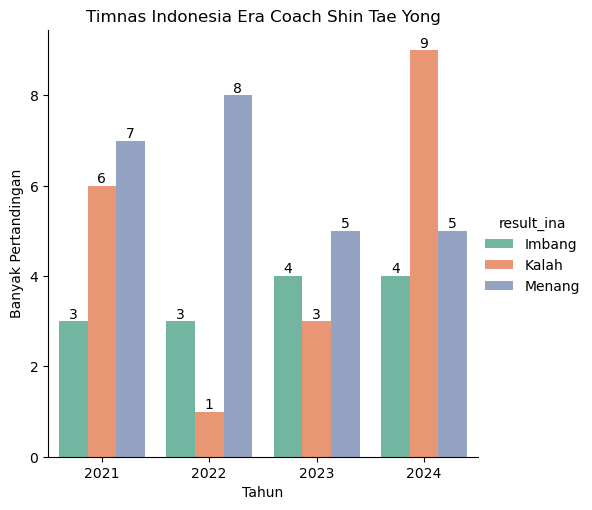

In [157]:
g = sns.catplot(
    data=era_sty_per_year, kind="bar",
    x="year", y=era_sty_per_year["tournament"], hue="result_ina", palette="Set2", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Timnas Indonesia Era Coach Shin Tae Yong")
plt.xlabel("Tahun")
plt.ylabel("Banyak Pertandingan")
plt.show()